In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
titanic_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


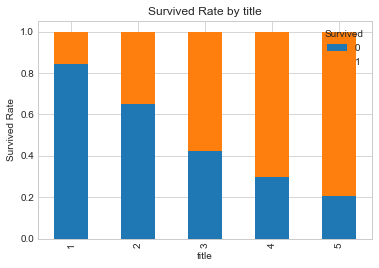

In [5]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'
    
def title_map(title):
    if title in ['Mr']:
        return 1
    elif title in ['Master']:
        return 3
    elif title in ['Ms', 'Mlle', 'Miss']:
        return 4
    elif title in ['Mrs', 'Mme']:
        return 5
    else:
        return 2
    
titanic_df['title'] = titanic_df['Name'].apply(get_title).apply(title_map)
test_df['title'] = test_df['Name'].apply(get_title).apply(title_map)
title_xt = pd.crosstab(titanic_df['title'], titanic_df['Survived'])
title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0) # делит массив title_xt на title_xt.sum(1)
#title_xt.sum(1) - сумма по строкам, в итоге получается доля выживших/не выживших от общего количества по тайтлу

title_xt_pct.plot(kind='bar', stacked=True, title='Survived Rate by title'); 
# stacked=true соединяет в один столбец 2 разных цвета, по высоте все столбики одинаковые на графике
plt.xlabel('title');
plt.ylabel('Survived Rate');



In [6]:
# убираем колонки не нужные для анализа и предикта
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_df = test_df.drop(['Name', 'Ticket'], axis=1)

In [7]:
#Embarcked
#Есть 2 пропущенные переменные в titanic_df, заменяем их на S т.к она чаще всего встречается
titanic_df['Embarked']=titanic_df['Embarked'].fillna('S')

In [15]:
embark_dammies_titanic = pd.get_dummies(titanic_df['Embarked'])
embark_dammies_titanic.drop(['S'], axis=1, inplace=True)
embark_dammies_titanic

,C,Q
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
5,0,1
6,0,0
7,0,0
8,0,0
9,1,0


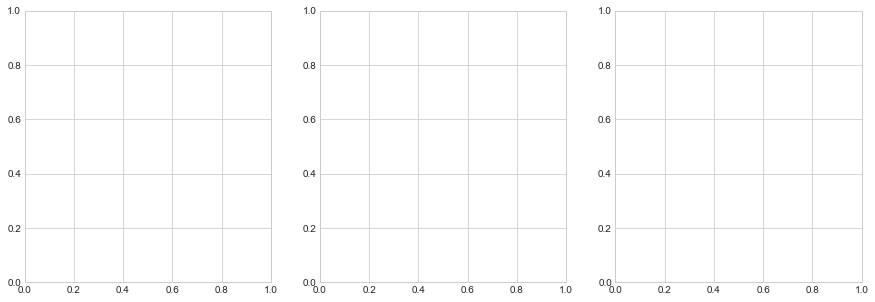